### imports

In [44]:
import os
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Function Definitions

In [2]:
# Function to print lines between min_ and max_ values
def print_some_lines(line_list, min_, max_):
    j = 0
    for i in madx_simulation_lines:
        if (j <= max_) and (j >= min_):
            print i
        j = j + 1
    return

print_all_lines = lambda x: sys.stdout.write("\n".join(x) + "\n")


In [81]:
########################################################################
# Read PTC Twiss and return dictionary of columns/values
########################################################################
def Read_PTC_Twiss_Return_Dict(filename, verbose=True):
    # Dictionary for output
    d = dict()
    d['HEADER_FILENAME'] = [filename]
    keywords = ''
    
    # First we open and count header lines
    fin0=open(filename,'r').readlines()
    headerlines = 0
    for l in fin0:
        # Store each header line
        headerlines = headerlines + 1
        # Stop if we find the line starting '* NAME'
        if '* NAME' in l:
            keywords = l
            break
        # Store the headers as d['HEADER_<name>'] = <value>
        else:
            #try:
            #    d[str('HEADER_'+l.split()[1])]=[float(l.split()[-1])]     
            #except ValueError:
            #    d[str('HEADER_'+l.split()[1])]=[str(l.split()[-1])]   
            if '"' in l:
                d[str('HEADER_'+l.split()[1])]=[str(l.split('"')[1])]
            else:
                d[str('HEADER_'+l.split()[1])]=[float(l.split()[-1])]                 
    headerlines = headerlines + 1    
    
    if verbose: print '\nRead_PTC_Twiss_Return_Dict found Keywords: \n',keywords
    
    # Make a list of column keywords to return (as an aid to iterating)
    dict_keys = []
    for key in keywords.split():
        dict_keys.append(key)
    dict_keys.remove('*')
    
    if verbose: print '\nRead_PTC_Twiss_Return_Dict Dict Keys: \n',dict_keys
    
    # Initialise empty dictionary entries for column keywords 
    for key in dict_keys:
        d[key]=[]
        
    if verbose: 
        print '\nRead_PTC_Twiss_Return_Dict header only dictionary \n'
        for i in d:
            print i, d[i]
    
    # Strip header
    fin1=open(filename,'r').readlines()[headerlines:]   
    
    # Populate the dictionary line by line
    for l in fin1:
        i = -1        
        for value in l.split():
            i = i+1
            if 'NAME' in dict_keys[i]:
                d[dict_keys[i]].append(str(value))
            else:
                d[dict_keys[i]].append(float(value))    
                
    # Return list of column keywords 'dict_keys', and dictionary 'd'
    return dict_keys, d

### Plot Parameters

In [50]:
plt.rcParams['figure.figsize'] = [8.0, 5.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['lines.linewidth'] = 1.5

In [19]:
save_folder = 'Plots/'

legend_label = 'Case'
main_label = 'PS_Dispersion_Mismatch_Lattice'

# PS Injection Dipsersion Mismatch

Compare optics for SEM Grid BSGH52 measurement lattice and used MD211 lattice

## Step 1: Run MAD-X for both cases

In [3]:
madx_command = '../../madx-linux64_v5_02_00 < MD211_Flat_file.madx'
os.system(madx_command)

0

In [80]:
madx_command = '../../madx-linux64_v5_02_00 < PS_Transfer_flat_file.madx'
os.system(madx_command)

0

## Step 2: Load TFS tables

In [82]:
d_md211_keys, d_md211 = Read_PTC_Twiss_Return_Dict('md211_final.tfs')


Read_PTC_Twiss_Return_Dict found Keywords: 
* NAME                                S               BETX               BETY               ALFX               ALFY              DISP1              DISP2              DISP3              DISP4                  X                 PX                  Y                 PY 


Read_PTC_Twiss_Return_Dict Dict Keys: 
['NAME', 'S', 'BETX', 'BETY', 'ALFX', 'ALFY', 'DISP1', 'DISP2', 'DISP3', 'DISP4', 'X', 'PX', 'Y', 'PY']

Read_PTC_Twiss_Return_Dict header only dictionary 

HEADER_ETA_C [-0.1342204838]
HEADER_TCOMIN [0.0]
HEADER_BETA11MIN [11.57151266]
HEADER_DELTAP [0.0]
HEADER_BETA33MIN [0.0]
HEADER_TCOMAX [0.0]
HEADER_PC [2.14]
HEADER_BETA22MAX [23.63949582]
HEADER_BETA12MIN [0.0]
HEADER_ALPHA_C [0.02701793732]
HEADER_BETA_X_MAX [23.1637637]
HEADER_BETA_X_MIN [11.57151266]
HEADER_ALPHA_C_P2 [-1000000.0]
HEADER_ALPHA_C_P3 [-1000000.0]
HEADER_BETA13MIN [0.0]
HEADER_TITLE ['Flat file generation for PTC-PyORBIT']
HEADER_BETA21MAX [0.0]
HEADER_BETA13MAX [

In [83]:
d_ps_transfer_keys, d_ps_transfer = Read_PTC_Twiss_Return_Dict('ps_transfer_final.tfs')


Read_PTC_Twiss_Return_Dict found Keywords: 
* NAME                                S               BETX               BETY               ALFX               ALFY              DISP1              DISP2              DISP3              DISP4                  X                 PX                  Y                 PY 


Read_PTC_Twiss_Return_Dict Dict Keys: 
['NAME', 'S', 'BETX', 'BETY', 'ALFX', 'ALFY', 'DISP1', 'DISP2', 'DISP3', 'DISP4', 'X', 'PX', 'Y', 'PY']

Read_PTC_Twiss_Return_Dict header only dictionary 

HEADER_ETA_C [-0.134221988]
HEADER_TCOMIN [0.0]
HEADER_BETA11MIN [11.55945384]
HEADER_DELTAP [0.0]
HEADER_BETA33MIN [0.0]
HEADER_TCOMAX [0.0]
HEADER_PC [2.14]
HEADER_BETA22MAX [23.76116924]
HEADER_BETA12MIN [0.0]
HEADER_ALPHA_C [0.02701643321]
HEADER_BETA_X_MAX [23.19539083]
HEADER_BETA_X_MIN [11.55945384]
HEADER_ALPHA_C_P2 [-1000000.0]
HEADER_ALPHA_C_P3 [-1000000.0]
HEADER_BETA13MIN [0.0]
HEADER_TITLE ['Flat file generation for PTC-PyORBIT']
HEADER_BETA21MAX [0.0]
HEADER_BETA13MAX [

## Step 3: Check s position of elements

The first element in the PS_Transfer sims is the SEM Grid

In [84]:
print 's [m]\t\tNAME'
print '---------------------------------------'
print d_ps_transfer['S'][-3], '\t\t', d_ps_transfer['NAME'][-3]
print d_ps_transfer['S'][-2], '\t\t', d_ps_transfer['NAME'][-2]
print d_ps_transfer['S'][-1], '\t\t', d_ps_transfer['NAME'][-1]
print d_ps_transfer['S'][0], '\t\t', d_ps_transfer['NAME'][0]
print d_ps_transfer['S'][1], '\t\t', d_ps_transfer['NAME'][1]
print d_ps_transfer['S'][2], '\t\t', d_ps_transfer['NAME'][2]
print d_ps_transfer['S'][3], '\t\t', d_ps_transfer['NAME'][3]
print d_ps_transfer['S'][4], '\t\t', d_ps_transfer['NAME'][4]

s [m]		NAME
---------------------------------------
628.2251 		"PS52$START"
628.3185 		"DRIFT_2"
628.3185 		"PSPI.BSG52_P_"
0.0 		"PI.BSG52"
1.5066 		"DRIFT_0"
1.5066 		"PS52$END"
1.5066 		"PR.BHR52$START"
1.5066 		"MP_D"


The first element in the MD211 sims is the horizontal wirescanner

In [85]:
print 's [m]\t\tNAME'
print '---------------------------------------'
print d_md211['S'][-3], '\t\t', d_md211['NAME'][-3]
print d_md211['S'][-2], '\t\t', d_md211['NAME'][-2]
print d_md211['S'][-1], '\t\t', d_md211['NAME'][-1]
print d_md211['S'][0], '\t\t', d_md211['NAME'][0]
print d_md211['S'][1], '\t\t', d_md211['NAME'][1]
print d_md211['S'][2], '\t\t', d_md211['NAME'][2]
print d_md211['S'][3], '\t\t', d_md211['NAME'][3]
print d_md211['S'][4], '\t\t', d_md211['NAME'][4]

s [m]		NAME
---------------------------------------
627.5155 		"PS65$START"
628.3185 		"DRIFT_4"
628.3185 		"PSPR.BWSH65_P_"
0.0 		"PR.BWSH65"
0.797 		"DRIFT_0"
0.797 		"PS65$END"
0.797 		"PR.BHT65$START"
0.797 		"MP65_F"


The BSG52 SEM grid is not present in the lattice of MD211, but we must find the distance between to plot correctly

In [86]:
print 's [m]\t\tNAME'
print '---------------------------------------'
print d_md211['S'][985], '\t\t', d_md211['NAME'][985]
print d_md211['S'][986], '\t\t', d_md211['NAME'][986]
print d_md211['S'][987], '\t\t', d_md211['NAME'][987]
print d_md211['S'][988], '\t\t', d_md211['NAME'][988]
print d_md211['S'][989], '\t\t', d_md211['NAME'][989]
print d_md211['S'][990], '\t\t', d_md211['NAME'][990]

s [m]		NAME
---------------------------------------
550.4796875 		"PR.BHR52.D"
550.4796875 		"MP52_J"
552.67728 		"PR.BHR52.F"
552.67728 		"MP52_F"
552.67728 		"PR.BHR52$END"
552.67728 		"PS53$START"


PR.BHR52$END is at 552.67728 m (1.5066 m in the PS Transfer lattice)

In [153]:
s_offset = 628.3185 - 552.67728 + 1.5066 + 4.5
print 'S offset = ', s_offset, 'm'

S offset =  81.64782 m


## Step 4: Plot to compare optics

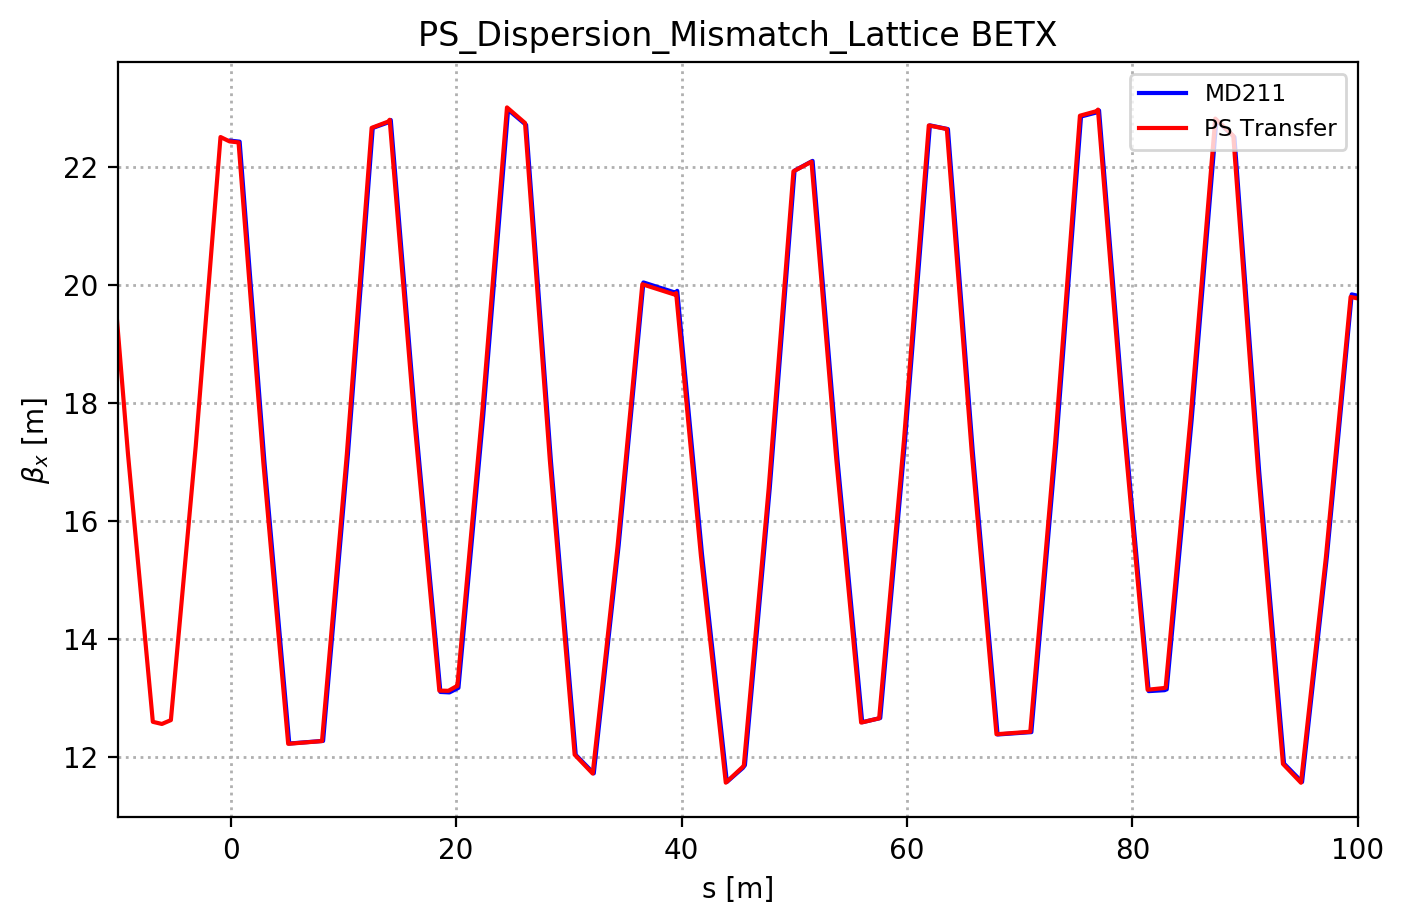

In [167]:
parameter = 'BETX'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + parameter
ax1.set_title(tit);

ax1.set_xlabel('s [m]');
ax1.set_ylabel(r'$\beta_x$ [m]');

x = np.array(d_ps_transfer['S'])-s_offset
y = d_ps_transfer[parameter]

ax1.plot(d_md211['S'], d_md211[parameter], label='MD211', color='b');
#ax1.plot(d_ps_transfer['S'], d_ps_transfer[parameter], label='PS Transfer', color='r');
ax1.plot(x, y, label='PS Transfer', color='r');
        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-10,100)

savename = save_folder + '/'+ main_label + '_' + parameter + '_zoom.png'
plt.savefig(savename, dpi = 200);

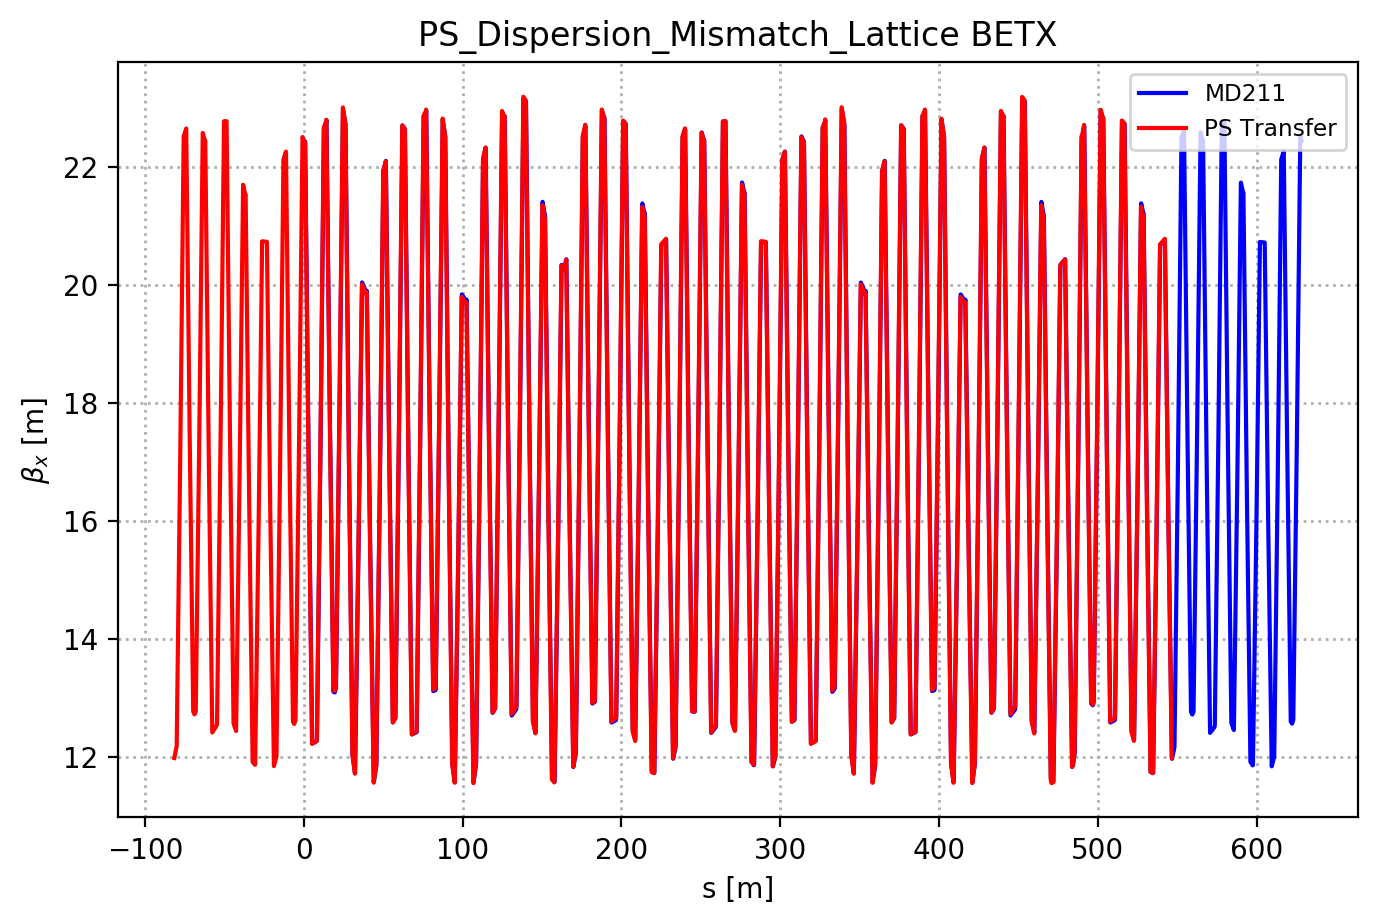

In [168]:
parameter = 'BETX'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + parameter
ax1.set_title(tit);

ax1.set_xlabel('s [m]');
ax1.set_ylabel(r'$\beta_x$ [m]');

x = np.array(d_ps_transfer['S'])-s_offset
y = d_ps_transfer[parameter]

ax1.plot(d_md211['S'], d_md211[parameter], label='MD211', color='b');
#ax1.plot(d_ps_transfer['S'], d_ps_transfer[parameter], label='PS Transfer', color='r');
ax1.plot(x, y, label='PS Transfer', color='r');
        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
#ax1.set_xlim(-10,10)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 200);

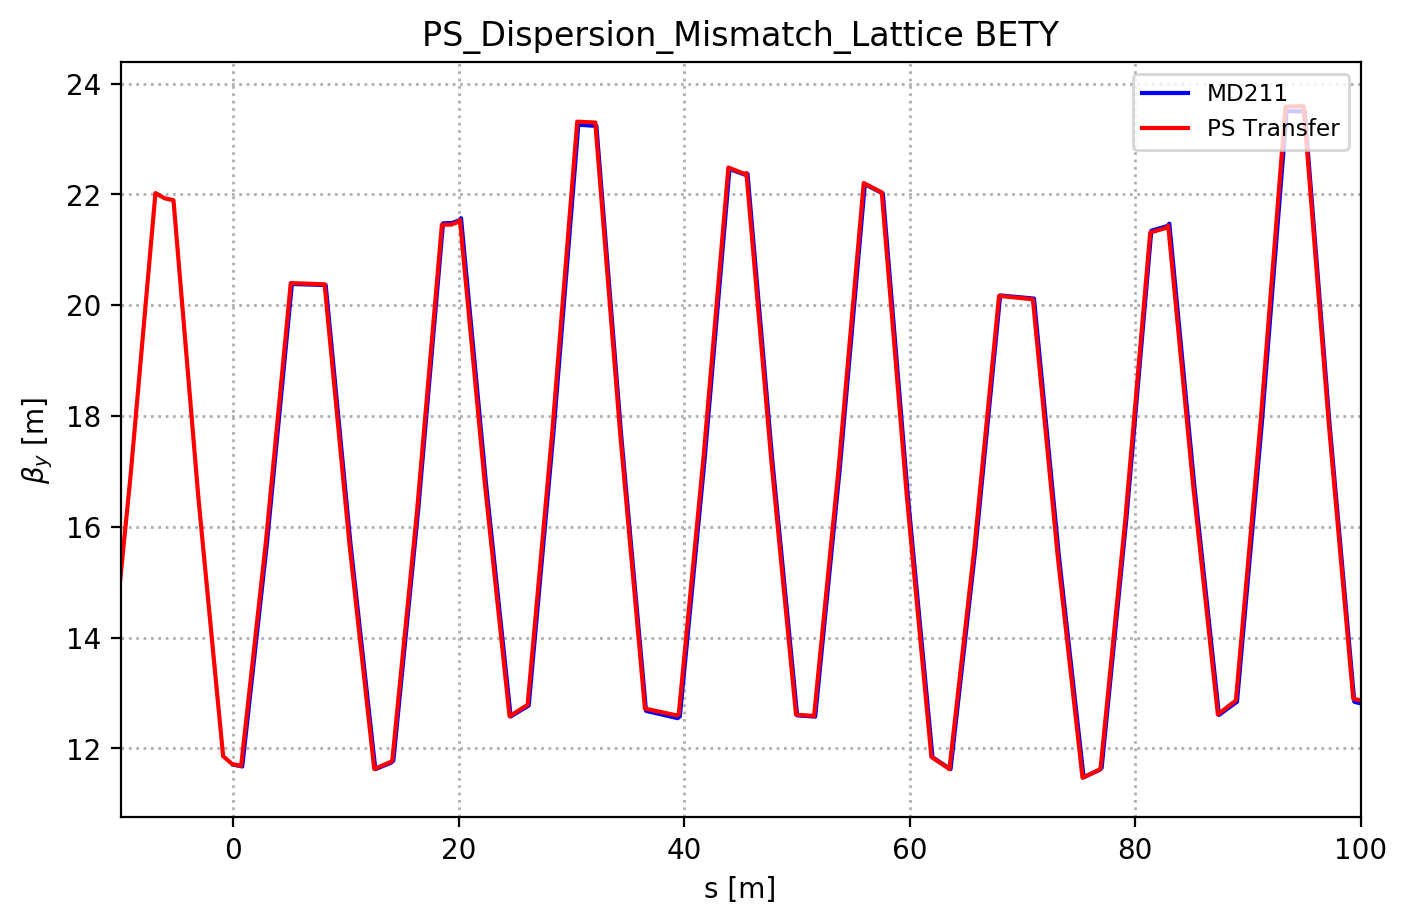

In [169]:
parameter = 'BETY'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + parameter
ax1.set_title(tit);

ax1.set_xlabel('s [m]');
ax1.set_ylabel(r'$\beta_y$ [m]');

x = np.array(d_ps_transfer['S'])-s_offset
y = d_ps_transfer[parameter]

ax1.plot(d_md211['S'], d_md211[parameter], label='MD211', color='b');
#ax1.plot(d_ps_transfer['S'], d_ps_transfer[parameter], label='PS Transfer', color='r');
ax1.plot(x, y, label='PS Transfer', color='r');
        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-10,100)

savename = save_folder + '/'+ main_label + '_' + parameter + '_zoom.png'
plt.savefig(savename, dpi = 200);

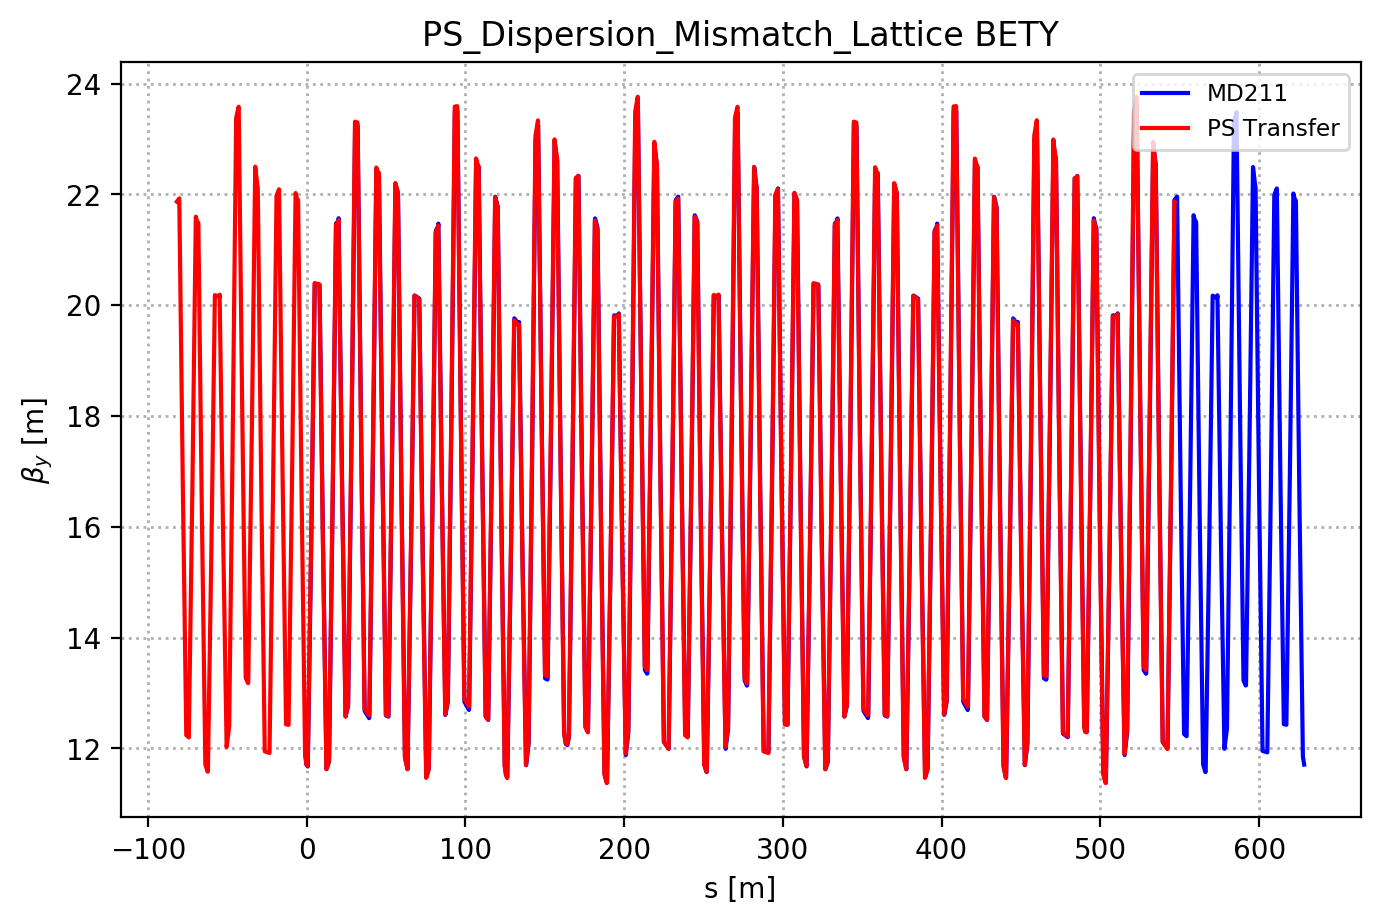

In [170]:
parameter = 'BETY'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + parameter
ax1.set_title(tit);

ax1.set_xlabel('s [m]');
ax1.set_ylabel(r'$\beta_y$ [m]');

x = np.array(d_ps_transfer['S'])-s_offset
y = d_ps_transfer[parameter]

ax1.plot(d_md211['S'], d_md211[parameter], label='MD211', color='b');
#ax1.plot(d_ps_transfer['S'], d_ps_transfer[parameter], label='PS Transfer', color='r');
ax1.plot(x, y, label='PS Transfer', color='r');
        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
#ax1.set_xlim(-10,10)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 200);

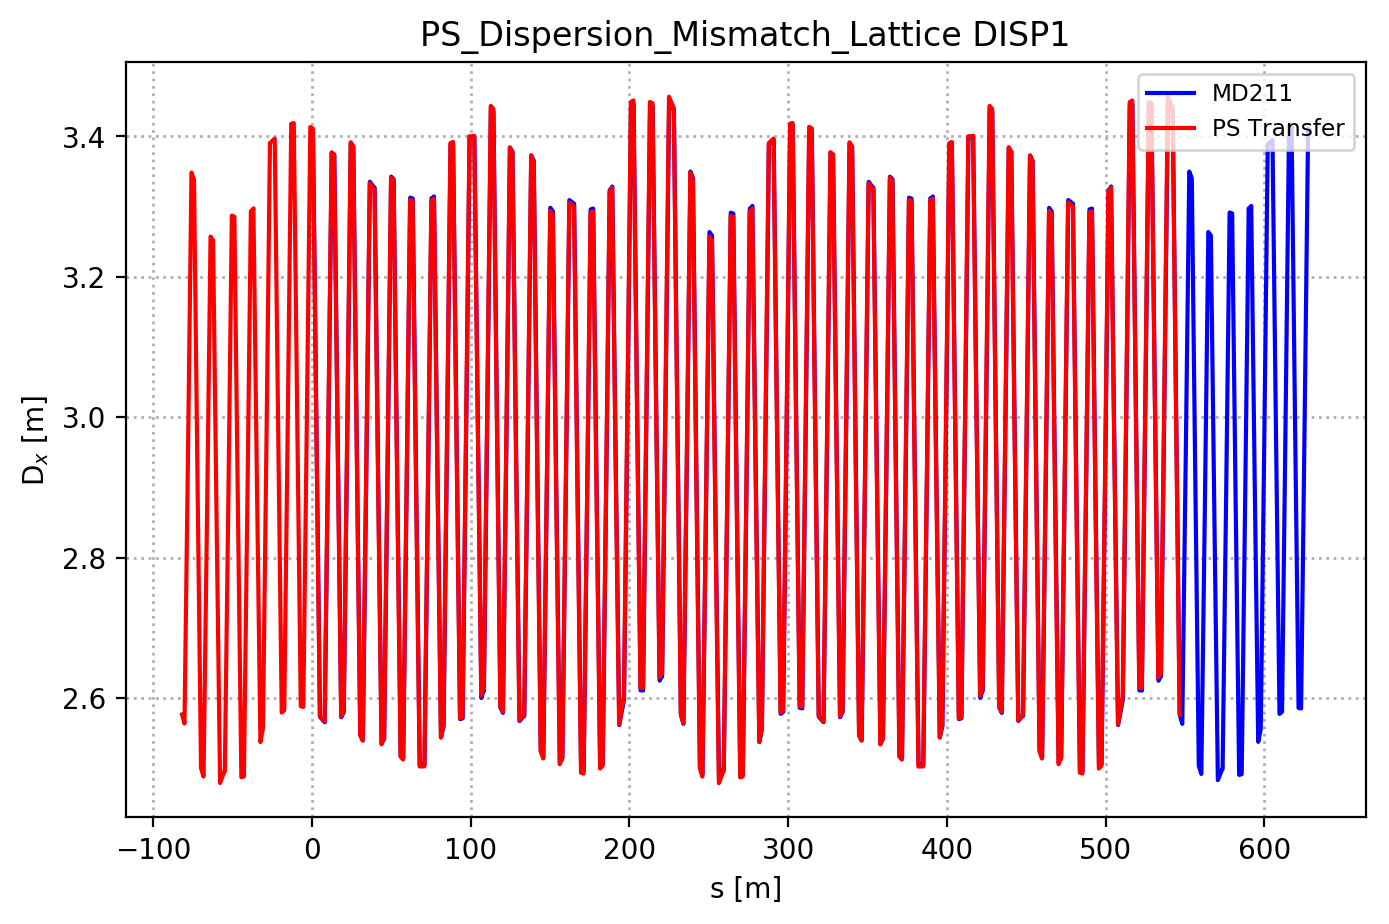

In [171]:
parameter = 'DISP1'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + parameter
ax1.set_title(tit);

ax1.set_xlabel('s [m]');
ax1.set_ylabel(r'D$_x$ [m]');

x = np.array(d_ps_transfer['S'])-s_offset
y = d_ps_transfer[parameter]

ax1.plot(d_md211['S'], d_md211[parameter], label='MD211', color='b');
#ax1.plot(d_ps_transfer['S'], d_ps_transfer[parameter], label='PS Transfer', color='r');
ax1.plot(x, y, label='PS Transfer', color='r');
        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
#ax1.set_xlim(-10,10)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 200);

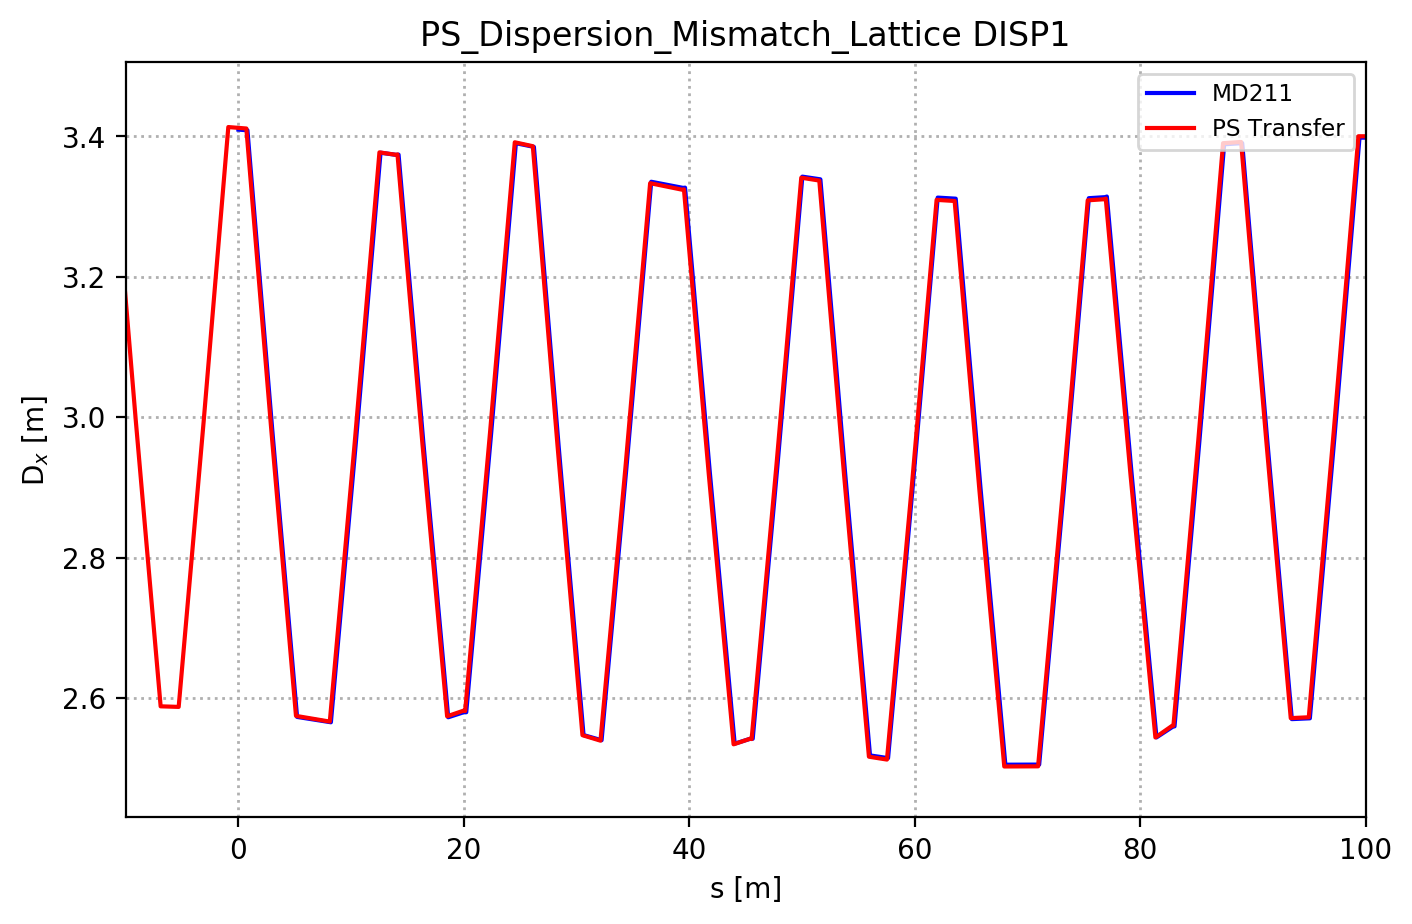

In [172]:
parameter = 'DISP1'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + parameter
ax1.set_title(tit);

ax1.set_xlabel('s [m]');
ax1.set_ylabel(r'D$_x$ [m]');

x = np.array(d_ps_transfer['S'])-s_offset
y = d_ps_transfer[parameter]

ax1.plot(d_md211['S'], d_md211[parameter], label='MD211', color='b');
#ax1.plot(d_ps_transfer['S'], d_ps_transfer[parameter], label='PS Transfer', color='r');
ax1.plot(x, y, label='PS Transfer', color='r');
        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-10,100)

savename = save_folder + '/'+ main_label + '_' + parameter + '_zoom.png'
plt.savefig(savename, dpi = 200);

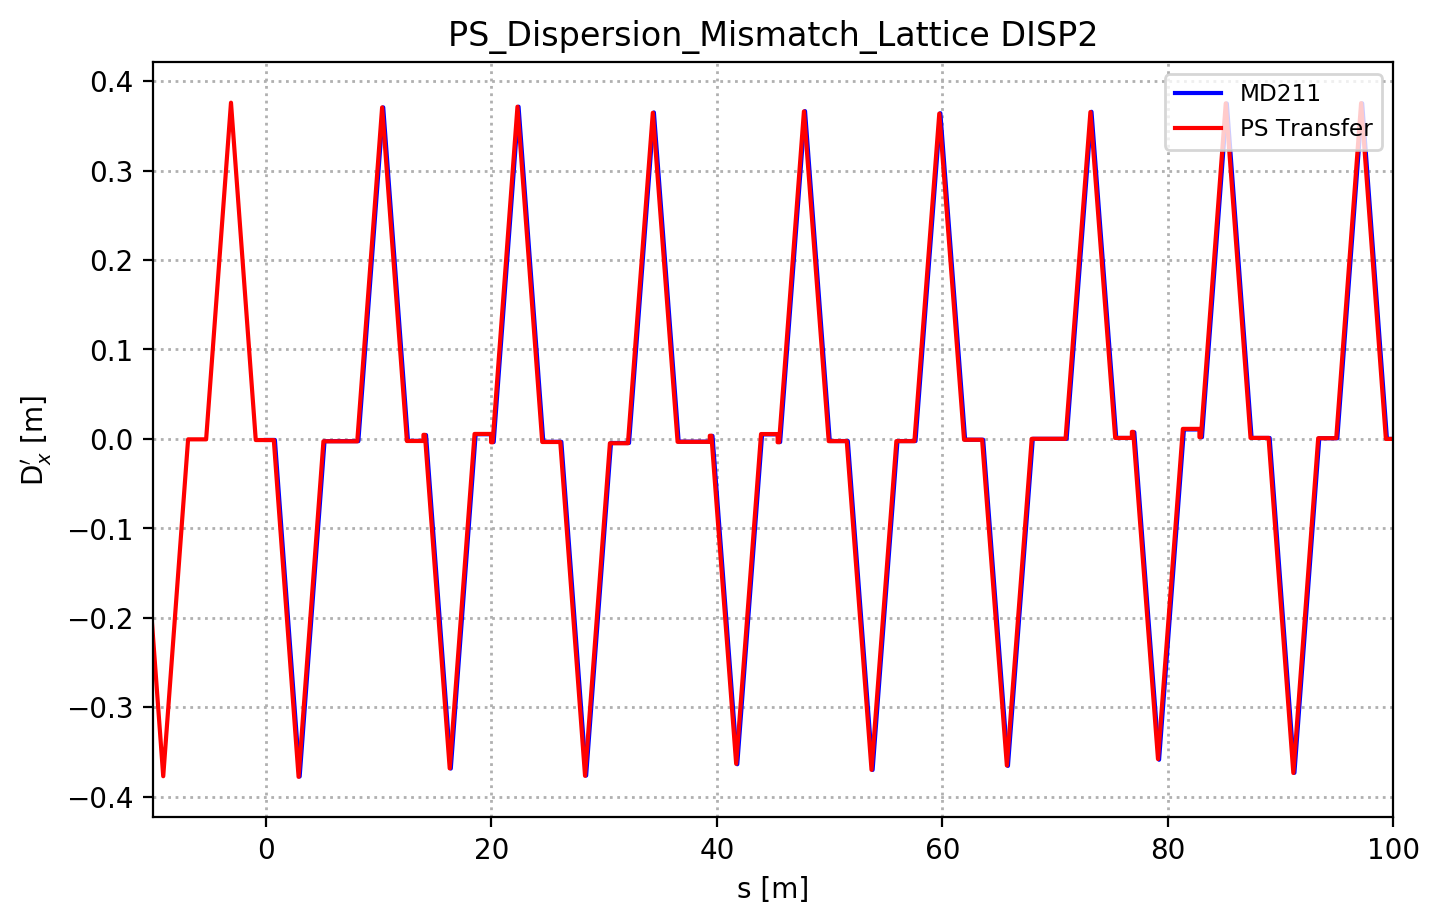

In [173]:
parameter = 'DISP2'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + parameter
ax1.set_title(tit);

ax1.set_xlabel('s [m]');
ax1.set_ylabel(r'D$_{x}^{\prime}$ [m]');

x = np.array(d_ps_transfer['S'])-s_offset
y = d_ps_transfer[parameter]

ax1.plot(d_md211['S'], d_md211[parameter], label='MD211', color='b');
#ax1.plot(d_ps_transfer['S'], d_ps_transfer[parameter], label='PS Transfer', color='r');
ax1.plot(x, y, label='PS Transfer', color='r');
        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-10,100)

savename = save_folder + '/'+ main_label + '_' + parameter + '_zoom.png'
plt.savefig(savename, dpi = 200);

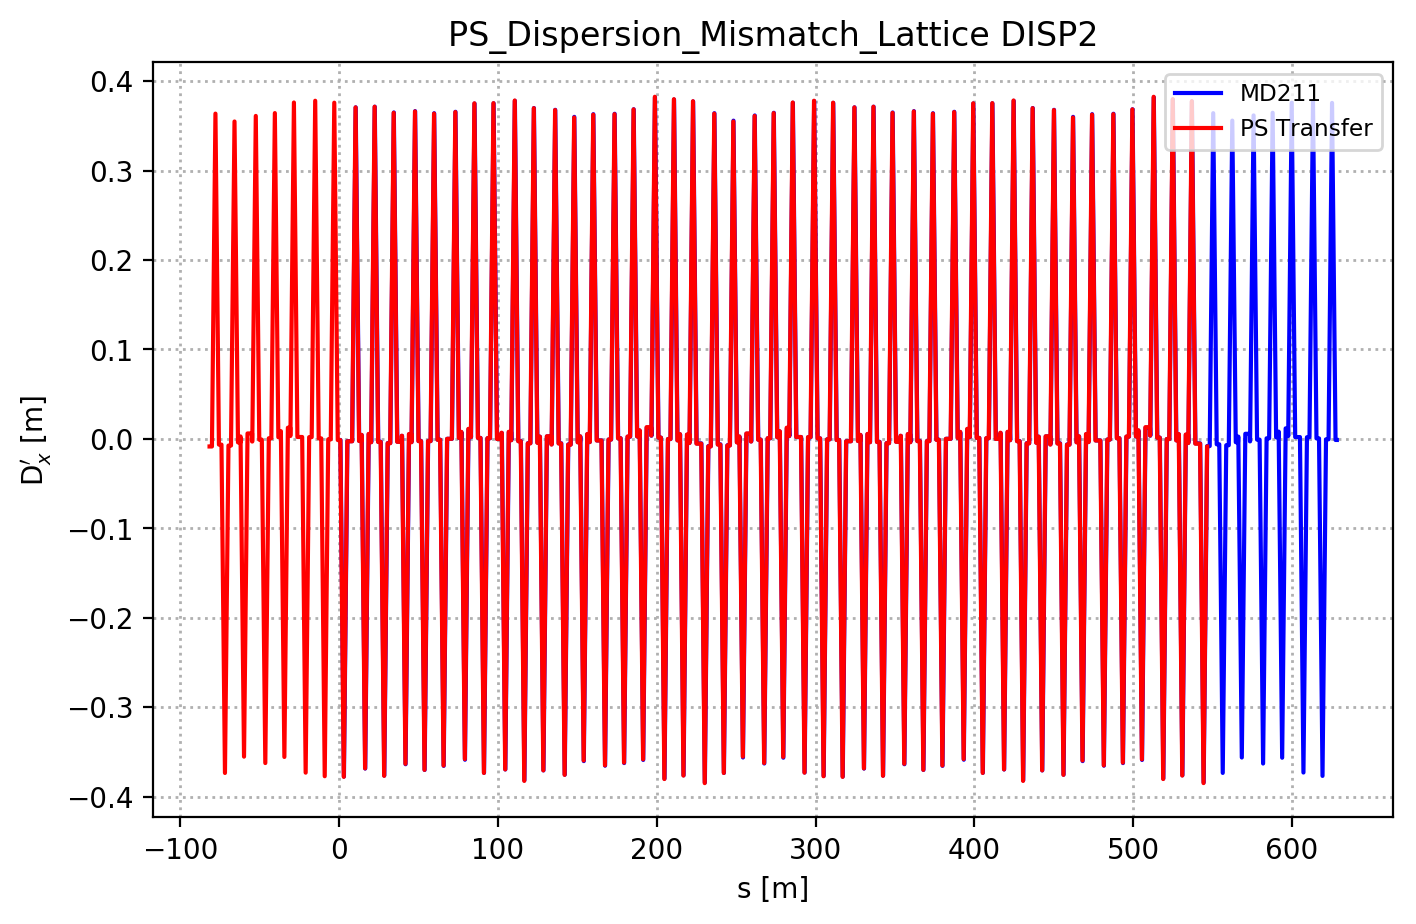

In [161]:
parameter = 'DISP2'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + parameter
ax1.set_title(tit);

ax1.set_xlabel('s [m]');
ax1.set_ylabel(r'D$_{x}^{\prime}$ [m]');

x = np.array(d_ps_transfer['S'])-s_offset
y = d_ps_transfer[parameter]

ax1.plot(d_md211['S'], d_md211[parameter], label='MD211', color='b');
#ax1.plot(d_ps_transfer['S'], d_ps_transfer[parameter], label='PS Transfer', color='r');
ax1.plot(x, y, label='PS Transfer', color='r');
        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
#ax1.set_xlim(-10,10)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 200);

## Step 5: Dispersion mismatch

From Matthew Fraser CERN TE-ABT: 
    As measured from BSG H52 SEM grid (see https://indico.cern.ch/event/828559/contributions/3528423/attachments/1938485/3214110/MFraser_SpaceChargeWS_PS_blowup.pdf):
    
    Operational D_x  = 2.633 m
    Operational D_x' = -0.1104
    
    ReMatched D_x  = 2.683 m
    ReMatched D_x' = -0.021

In [189]:
print 's [m]\tNAME\t\tD_x'
print d_ps_transfer['S'][0],'\t', d_ps_transfer['NAME'][0],'\t', d_ps_transfer['DISP1'][0]

s [m]	NAME		D_x
0.0 	"PI.BSG52" 	2.576404793


In [191]:
Delta_D_x = 2.633 - d_ps_transfer['DISP1'][0]
print 'Delta_D_x = ', Delta_D_x

Delta_D_x =  0.056595207


In [192]:
Delta_D_xp = -0.1104 - d_ps_transfer['DISP2'][0]
print 'Delta_D_xp = ', Delta_D_xp

Delta_D_xp =  -0.10190496399


Our new values will be:

In [194]:
print d_md211['DISP1'][0], ' m\t->', d_md211['DISP1'][0]+Delta_D_x, ' m'

3.409625213  m	-> 3.46622042  m


## Normalised dispersion

D_n = D_x / sqrt(beta_x)

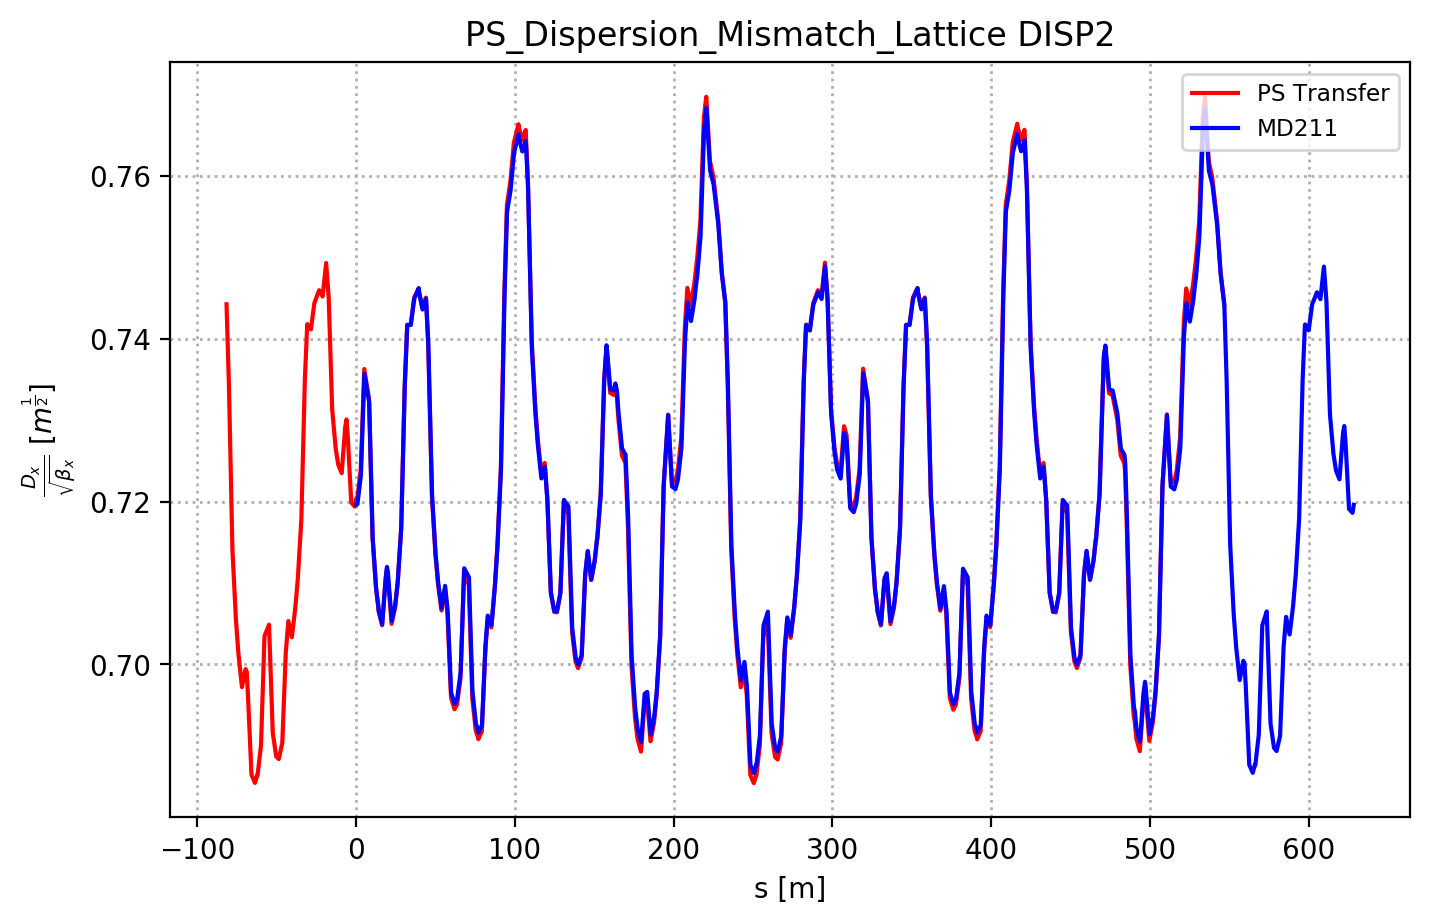

In [200]:
parameter1 = 'DISP1'
parameter2 = 'BETX'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + parameter
ax1.set_title(tit);

ax1.set_xlabel('s [m]');
ax1.set_ylabel(r'$\frac{D_x}{\sqrt{\beta_x}}$ [$m^{\frac{1}{2}}$]');

x = np.array(d_ps_transfer['S'])-s_offset
y = d_ps_transfer[parameter1]/np.sqrt(d_ps_transfer[parameter2])
ax1.plot(x, y, label='PS Transfer', color='r');

xx = np.array(d_md211['S'])
yy = np.array(d_md211[parameter1]/np.sqrt(d_md211[parameter2]))
ax1.plot(xx, yy, label='MD211', color='b');

        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
#ax1.set_xlim(-10,10)

savename = save_folder + '/'+ main_label + '_' + parameter1 + '_norm.png'
plt.savefig(savename, dpi = 200);

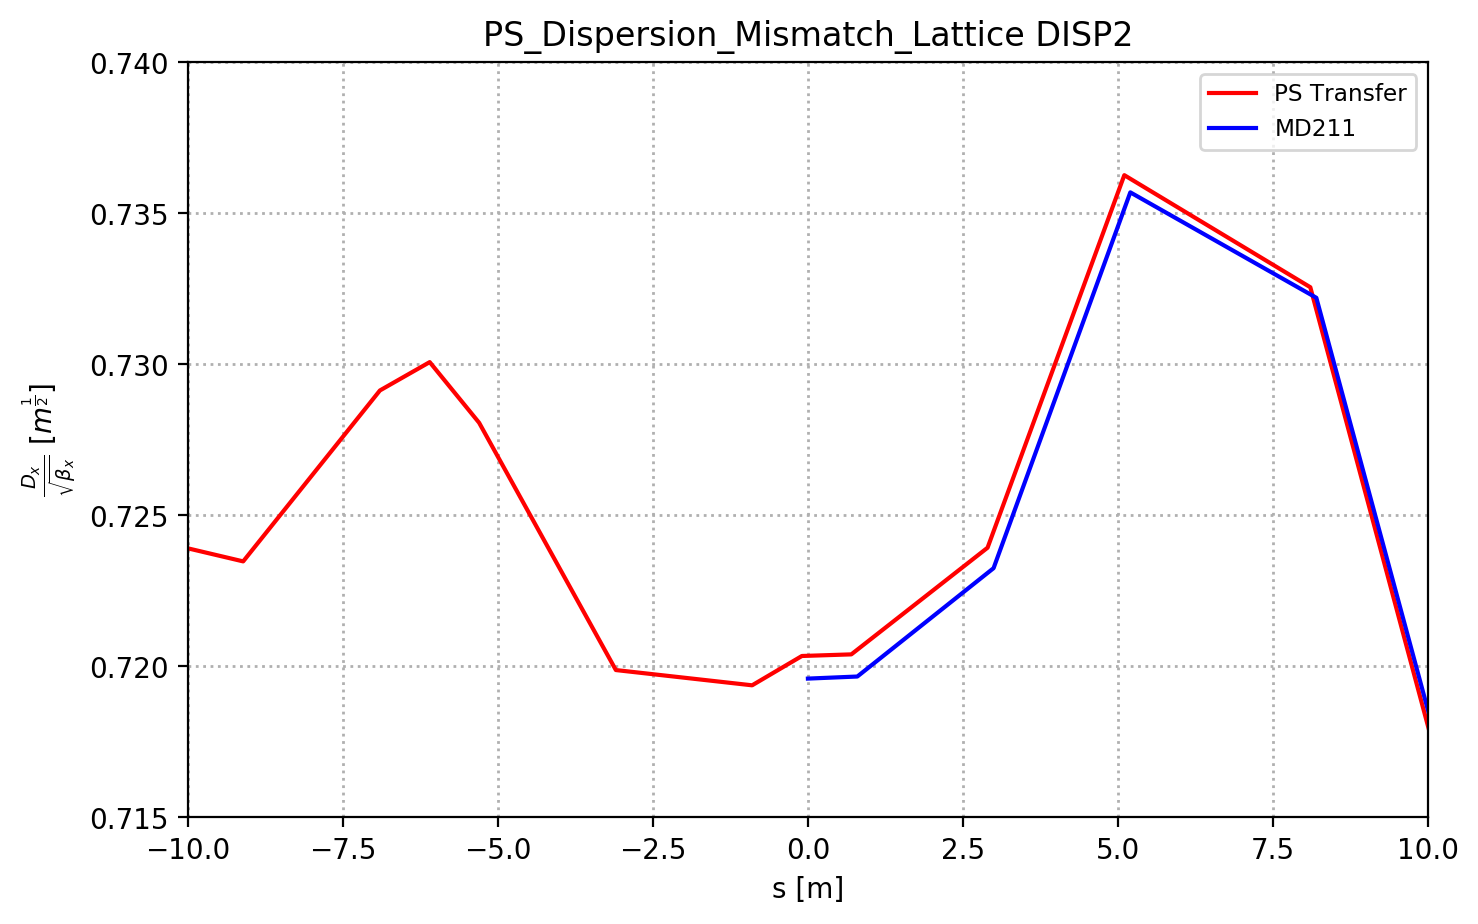

In [206]:
parameter1 = 'DISP1'
parameter2 = 'BETX'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + parameter
ax1.set_title(tit);

ax1.set_xlabel('s [m]');
ax1.set_ylabel(r'$\frac{D_x}{\sqrt{\beta_x}}$ [$m^{\frac{1}{2}}$]');

x = np.array(d_ps_transfer['S'])-s_offset
y = d_ps_transfer[parameter1]/np.sqrt(d_ps_transfer[parameter2])
ax1.plot(x, y, label='PS Transfer', color='r');

xx = np.array(d_md211['S'])
yy = np.array(d_md211[parameter1]/np.sqrt(d_md211[parameter2]))
ax1.plot(xx, yy, label='MD211', color='b');

        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-10,10)
ax1.set_ylim(0.715,0.74)

savename = save_folder + '/'+ main_label + '_' + parameter1 + '_norm_zoom.png'
plt.savefig(savename, dpi = 200);

## From fitting of dispersion vector

- Lattice 
    - D_x_0 = 2.35 m
    - D_xp_0 = -0.007439
- Operational
    - D_x_0 = 2.633 m
    - D_xp_0 = -0.1104
- ReMatched
    - D_x_0 = 2.683 m
    - D_xp_0 = -0.022

From Matt (measured SEM grid):
- Operational 
    - D_x_0  = 2.633 m
    - D_xp_0 = -0.1104

- ReMatched 
    - D_x_0  = 2.683 m
    - D_xp_0 = -0.021

### In reality our dispersion mismatch is:

In [213]:
Dipersion_mismatch = (2.633 - 2.35)
Dipersion_prime_mismatch = (-0.007439 - -0.1104)

In [214]:
print Dipersion_mismatch, 'm'
print Dipersion_prime_mismatch

0.283 m
0.102961
